<a href="https://colab.research.google.com/github/Taghr66d/MSc-SummerProject2025/blob/main/Test_Real_noise_on_CNN_Week5ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import load_model

model = load_model("/content/CNN_Week5.h5")


In [5]:
import numpy as np

blip_data = np.load("blip_real_noise_dataset.npz")
cusp_data = np.load("cusp_dataset_real_noise.npz")


X_blip = blip_data["X"]
y_blip = blip_data["y"]

X_cusp = cusp_data["X"]
y_cusp = cusp_data["y"]


X_test = np.concatenate((X_blip, X_cusp), axis=0)
y_test = np.concatenate((y_blip, y_cusp), axis=0)


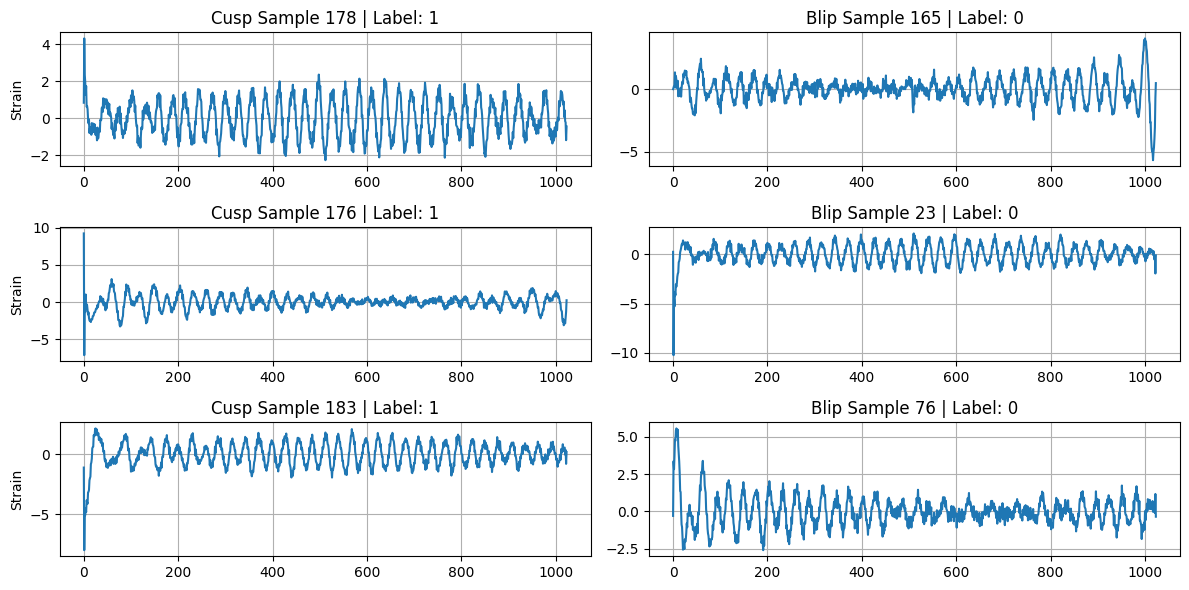

In [17]:
import numpy as np
import matplotlib.pyplot as plt


X1 = cusp_data["X"]
y1 = cusp_data["y"]
X2 = blip_data["X"]
y2 = blip_data["y"]

n_samples = 3

plt.figure(figsize=(12, n_samples * 2))

for i in range(n_samples):
    # Random cusp sample
    idx1 = np.random.randint(0, len(X1))
    plt.subplot(n_samples, 2, i * 2 + 1)
    plt.plot(X1[idx1])
    plt.title(f"Cusp Sample {idx1} | Label: {int(y1[idx1])}")
    plt.ylabel("Strain")
    plt.grid(True)

    # Random blip sample
    idx2 = np.random.randint(0, len(X2))
    plt.subplot(n_samples, 2, i * 2 + 2)
    plt.plot(X2[idx2])
    plt.title(f"Blip Sample {idx2} | Label: {int(y2[idx2])}")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
# Expand dims for CNN
X_test = X_test[..., np.newaxis]


In [7]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc * 100:.2f}%")


y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).squeeze()


Test Accuracy: 50.00%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, target_names=["Blip", "Cusp"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

        Blip       0.50      1.00      0.67       200
        Cusp       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400

Confusion Matrix:
[[200   0]
 [200   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
